# Importing Libraries

In [1]:
# Basics Library
import numpy as np
import pandas as pd
import math
import scipy.stats as stats
import pylab

# For Visulization 
import seaborn as sns
import matplotlib.pyplot as plt


# Preprocessig for Data Encoding
from sklearn.preprocessing import LabelEncoder,StandardScaler

# For split data in train and test part , And GridSearchCV other use for Hyperparameter Tuning
from sklearn.model_selection import train_test_split, GridSearchCV,StratifiedKFold,RandomizedSearchCV

# Use Diff Classifier for Model Learning
from sklearn.preprocessing import RobustScaler

from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb

from pprint import pprint

from sklearn.metrics import r2_score, mean_squared_error, median_absolute_error

# EDA and Pre-processing¶
Exploratory data analysis (EDA) is used by data scientists to analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods.

Data preprocessing is a data mining technique that involves transforming raw data into an understandable format

In [2]:
df_lon = pd.read_csv('london listings.csv')
df_lon.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,13913,https://www.airbnb.com/rooms/13913,20210209201301,2021-02-12,Holiday London DB Room Let-on going,My bright double bedroom with a large window h...,Finsbury Park is a friendly melting pot commun...,https://a0.muscache.com/pictures/miso/Hosting-...,54730,https://www.airbnb.com/users/show/54730,Alina,2009-11-16,"London, England, United Kingdom",I am a Multi-Media Visual Artist and Creative ...,within a few hours,100%,67%,f,https://a0.muscache.com/im/users/54730/profile...,https://a0.muscache.com/im/users/54730/profile...,LB of Islington,3.0,3.0,"['email', 'phone', 'facebook', 'reviews', 'off...",t,t,"Islington, Greater London, United Kingdom",Islington,NaN,51.56802,-0.11121,Private room in apartment,Private room,2,NaN,1 shared bath,1.0,0.0,"[""Oven"", ""Shampoo"", ""Refrigerator"", ""Hangers"",...",$40.00,1,29,1.0,1.0,29.0,29.0,1.0,29.0,NaN,t,30,60,90,365,2021-02-12,21,1,0,2010-08-18,2020-02-22,97.0,10.0,10.0,10.0,10.0,9.0,9.0,NaN,f,2,1,1,0,0.16
1,15400,https://www.airbnb.com/rooms/15400,20210209201301,2021-02-12,Bright Chelsea Apartment. Chelsea!,Lots of windows and light. St Luke's Gardens ...,It is Chelsea.,https://a0.muscache.com/pictures/428392/462d26...,60302,https://www.airbnb.com/users/show/60302,Philippa,2009-12-05,"Kensington, England, United Kingdom","English, grandmother, I have travelled quite ...",within a few hours,100%,NaN,f,https://a0.muscache.com/im/users/60302/profile...,https://a0.muscache.com/im/users/60302/profile...,Chelsea,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"London, United Kingdom",Kensington and Chelsea,NaN,51.48796,-0.16898,Entire apartment,Entire home/apt,2,NaN,1 bath,1.0,1.0,"[""Refrigerator"", ""Shampoo"", ""Long term stays a...",$75.00,10,50,10.0,10.0,50.0,50.0,10.0,50.0,NaN,t,16,16,16,189,2021-02-12,89,1,0,2009-12-21,2020-03-16,96.0,10.0,10.0,10.0,10.0,10.0,9.0,NaN,t,1,1,0,0,0.66
2,17402,https://www.airbnb.com/rooms/17402,20210209201301,2021-02-12,Superb 3-Bed/2 Bath & Wifi: Trendy W1,You'll have a wonderful stay in this superb mo...,"Location, location, location! You won't find b...",https://a0.muscache.com/pictures/39d5309d-fba7...,67564,https://www.airbnb.com/users/show/67564,Liz,2010-01-04,"London, England, United Kingdom",We are Liz and Jack. We manage a number of ho...,a few days or more,0%,100%,t,https://a0.muscache.com/im/users/67564/profile...,https://a0.muscache.com/im/users/67564/profile...,Fitzrovia,18.0,18.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"London, Fitzrovia, United Kingdom",Westminster,NaN,51.52195,-0.14094,Entire apartment,Entire home/apt,6,NaN,2 baths,3.0,3.0,"[""Oven"", ""Shampoo"", ""Refrigerator"", ""Hangers"",...",$307.00,4,365

In [3]:
pd.set_option('display.max_rows', df_lon.shape[0]+1)
df_lon.describe(include = 'all').transpose()


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,76534,NaN,NaN,NaN,2.60855e+07,1.35323e+07,13913,1.52633e+07,2.62478e+07,3.8339e+07,4.8103e+07
listing_url,76534,76534,https://www.airbnb.com/rooms/9087606,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
scrape_id,76534,NaN,NaN,NaN,2.02102e+13,16.3478,2.02102e+13,2.02102e+13,2.02102e+13,2.02102e+13,2.02102e+13
last_scraped,76534,7,2021-02-12,27692,NaN,NaN,NaN,NaN,NaN,NaN,NaN
name,76510,74358,Double room,41,NaN,NaN,NaN,NaN,NaN,NaN,NaN
description,73372,69993,Whether you are just getting away for the week...,141,NaN,NaN,NaN,NaN,NaN,NaN,NaN
neighborhood_overview,46750,39193,Portobello Market is a ‘must’ as it is one of ...,47,NaN,NaN,NaN,NaN,NaN,NaN,NaN
picture_url,76534,74799,https://a0.muscache.com/pictures/f2d996a9-0b8e...,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_id,76534,NaN,NaN,NaN,9.73765e+07,1.02686e+08,2010,1.6365e+07,5.01286e+07,1.5676e+08,3.87641e+08
host_url,76534,50764,https://www.airbnb.com/users/show/33889201,872,NaN,NaN,NaN,NaN,NaN,NaN,NaN


ID is just a random number so we dropped it 

In [4]:
len(df_lon["id"].unique())
df_lon.columns


Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

In [5]:
df_lon.shape

(76534, 74)

#### Drop irrelevant columns

In [6]:
to_drop= ['listing_url', 'scrape_id', 'last_scraped',
'name', 'description', 'neighborhood_overview', 'picture_url','host_is_superhost',
'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
'host_about', 'host_response_time', 'host_response_rate',
'host_acceptance_rate','host_thumbnail_url',
'host_picture_url', 'host_listings_count',
'host_total_listings_count', 'host_verifications',
'host_has_profile_pic', 'host_identity_verified', 'neighbourhood','host_neighbourhood', 'bathrooms', 'neighbourhood_group_cleansed',
'amenities', 'maximum_nights', 'minimum_minimum_nights',
'maximum_minimum_nights', 'minimum_maximum_nights',
'maximum_maximum_nights', 'minimum_nights_avg_ntm',
'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability',
'availability_30', 'availability_60', 'availability_90',
'calendar_last_scraped', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review',
'last_review','review_scores_accuracy',
'review_scores_cleanliness', 'review_scores_checkin',
'review_scores_communication', 'review_scores_location',
'review_scores_value', 'license',
'calculated_host_listings_count',
'calculated_host_listings_count_entire_homes',
'calculated_host_listings_count_private_rooms',
'calculated_host_listings_count_shared_rooms', 'reviews_per_month']

In [7]:
df_lon.drop(columns=to_drop, inplace=True)
df_lon.head()

,id,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,price,minimum_nights,availability_365,number_of_reviews,review_scores_rating,instant_bookable
0,13913,Islington,51.56802,-0.11121,Private room in apartment,Private room,2,1 shared bath,1.0,0.0,$40.00,1,365,21,97.0,f
1,15400,Kensington and Chelsea,51.48796,-0.16898,Entire apartment,Entire home/apt,2,1 bath,1.0,1.0,$75.00,10,189,89,96.0,t
2,17402,Westminster,51.52195,-0.14094,Entire apartment,Entire home/apt,6,2 baths,3.0,3.0,$307.00,4,270,42,94.0,f
3,17506,Hammersmith and Fulham,51.47935,-0.19743,Private room in townhouse,Private room,2,1 private bath,1.0,1.0,$150.00,3,364,0,NaN,f
4,25123,Barnet,51.57224,-0.20906,Private room in house,Private room,2,1.5 shared baths,1.0,0.0,$29.00,10,43,129,96.0,t


In [8]:
df_lon.shape

(76534, 16)

In [9]:
df_lon.dtypes

id                          int64
neighbourhood_cleansed     object
latitude                  float64
longitude                 float64
property_type              object
room_type                  object
accommodates                int64
bathrooms_text             object
bedrooms                  float64
beds                      float64
price                      object
minimum_nights              int64
availability_365            int64
number_of_reviews           int64
review_scores_rating      float64
instant_bookable           object
dtype: object

In [10]:
print(df_lon.isna().sum())

id                            0
neighbourhood_cleansed        0
latitude                      0
longitude                     0
property_type                 0
room_type                     0
accommodates                  0
bathrooms_text              181
bedrooms                   4838
beds                       1219
price                         0
minimum_nights                0
availability_365              0
number_of_reviews             0
review_scores_rating      23937
instant_bookable              0
dtype: int64


# Data Cleaning and Transformation


### We drop any entries that are inconsistent; i.e. predictors accommodates, bedrooms, beds, or price with a value of 0.

We convert the format in price from $1.00 into a float of 1.00. because price has type object and we have to convert it into float.

In [11]:
# convert formatting for price
df_lon['price'] = (df_lon['price'].str.replace(r'[^-+\d.]', '').astype(float))

In [12]:
# drop any inconsistent values
print('How many of Accommodates have value 0:', len(df_lon[df_lon['accommodates'] == 0]))
print('How many of Bedrooms have value 0:', len(df_lon[df_lon['bedrooms'] == 0]))
print('How many of Beds have value 0:', len(df_lon[df_lon['beds'] == 0]))
print('Number of Listings with Price $0.00:', len(df_lon[df_lon['price'] == 0.00]))


How many of Accommodates have value 0: 8
How many of Bedrooms have value 0: 0
How many of Beds have value 0: 2850
Number of Listings with Price $0.00: 24


Now drop all inconsistant values

In [13]:
df_lon = df_lon[df_lon['accommodates'] != 0]
df_lon = df_lon[df_lon['bedrooms'] != 0]
df_lon = df_lon[df_lon['beds'] != 0]
df_lon = df_lon[df_lon['price'] != 0.00]

### Price

In [14]:
df_lon["price"].describe()

count    73661.000000
mean       115.179715
std        315.963579
min          7.000000
25%         43.000000
50%         75.000000
75%        122.000000
max      17746.000000
Name: price, dtype: float64

We see that the average price is 115 dollars. Price varies between 0 to 17K$

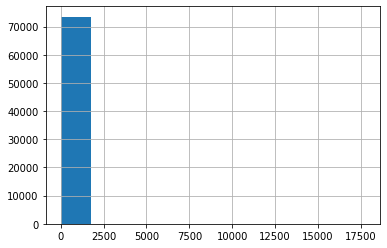

In [15]:
### See the distribution of price

hist_price=df_lon["price"].hist()
### We observe that most listings have price less than $2000

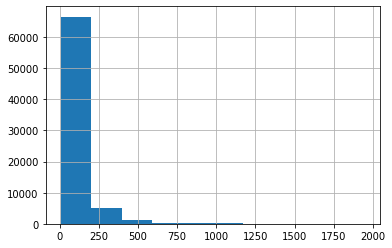

In [16]:
### Lets plot histogram for prices less than $2000

hist_price1=df_lon["price"][df_lon["price"]<2000].hist()
### This give a clearer picture!

How many listings have price more than 2000?

In [17]:
df_lon[df_lon["price"]>2000].shape

(106, 16)

we can see that only 106 listings have price per day > 2000. These are either super lavish listings or there was an error during input. Nonetheless, since this records are skewing our data a lot, we will treat them as outliers and drop them.

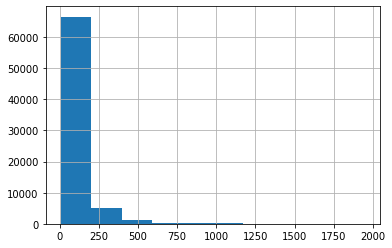

In [18]:
df_lon=df_lon[df_lon["price"]<2000]

### We see a more Gaussian distribution here
hist_price2=df_lon["price"][df_lon["price"]<2000].hist()

In [19]:
### Looking at the price column again
df_lon["price"].describe()

count    73534.000000
mean       106.148856
std        121.732709
min          7.000000
25%         43.000000
50%         75.000000
75%        121.000000
max       1951.000000
Name: price, dtype: float64

In [20]:
df_lon.shape

(73534, 16)

We see that the average price is 104. Price varies between 0 to 1999 and we still have enough records 75,534 listings

Although we have removed potential outliers But still the distribution of the 'price' is not normmally distributed. So we have apply some transformation to convert it into normally distribution we can do by applying log transformation price column which is also our response varibale 

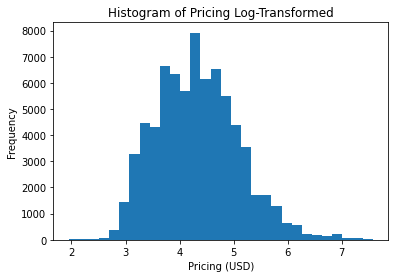

In [21]:
# log transform of 'price'
df_lon['price_log'] = df_lon['price'].apply(lambda x: math.log(x))

# visualize distribution of price (target variable)
plt.hist(df_lon['price_log'], bins=30)
plt.title("Histogram of Pricing Log-Transformed")
plt.xlabel("Pricing (USD)")
plt.ylabel("Frequency")
plt.show()

Text(0.5, 1.0, 'Q-Q plot for log-transformed pricing')

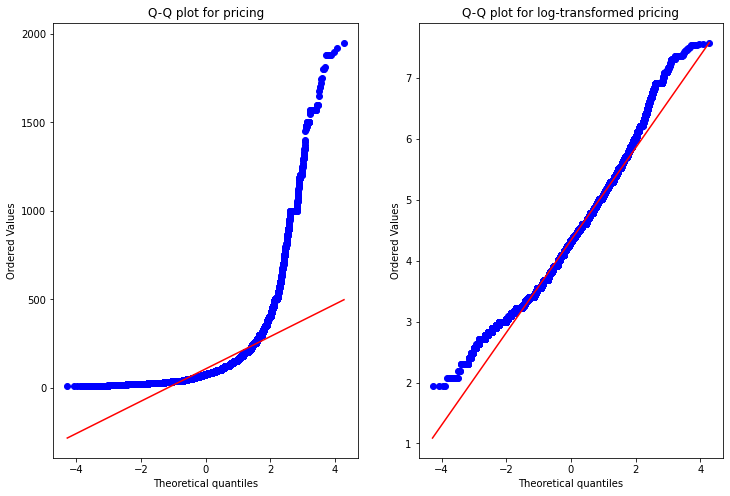

In [22]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.subplot(1, 2, 1)
stats.probplot(df_lon['price'], dist="norm", plot=pylab)
plt.title("Q-Q plot for pricing")

plt.subplot(1, 2, 2)
stats.probplot(df_lon['price_log'], dist="norm", plot=pylab)
plt.title("Q-Q plot for log-transformed pricing")


### Missing Value dealing

In [23]:
df_lon.isnull().sum()

id                            0
neighbourhood_cleansed        0
latitude                      0
longitude                     0
property_type                 0
room_type                     0
accommodates                  0
bathrooms_text              160
bedrooms                   4449
beds                       1196
price                         0
minimum_nights                0
availability_365              0
number_of_reviews             0
review_scores_rating      22902
instant_bookable              0
price_log                     0
dtype: int64

'host_neighbourhood' is a categorical variables so we will fill the missing value with most frequent value within column. 
'bedrooms' and 'beds' have numerical datatypes so we will fill the missing values by median

In [24]:
# mode = df_NYC['host_is_superhost'].mode()
# df_NYC['host_is_superhost'].fillna(mode[0], inplace=True)

mode = df_lon['neighbourhood_cleansed'].mode()
df_lon['neighbourhood_cleansed'].fillna(mode[0], inplace=True)

median = df_lon['bedrooms'].median()
df_lon['bedrooms'].fillna(median, inplace=True)

median = df_lon['beds'].median()
df_lon['beds'].fillna(median, inplace=True)

'bathrooms_text' contains string data but we need only numerical number of bathrooms in accommodation for our price modeling so we use regular expression for it 

In [25]:
df_lon['bathrooms_text'].unique()

array(['1 bath', '2 baths', '1 private bath', '1.5 baths', nan,
       '1.5 shared baths', '1 shared bath', '2.5 shared baths',
       '2 shared baths', '0 shared baths', '2.5 baths',
       'Shared half-bath', '4 baths', '3 baths', '0 baths',
       '3 shared baths', '3.5 baths', 'Half-bath', '5 baths', '4.5 baths',
       '5 shared baths', '3.5 shared baths', 'Private half-bath',
       '7 baths', '4 shared baths', '6 baths', '6 shared baths',
       '5.5 baths', '8.5 baths', '7 shared baths', '4.5 shared baths',
       '6.5 baths', '8 shared baths', '17 baths', '11 baths', '10 baths',
       '7.5 baths', '8 baths', '10.5 baths', '9 baths', '12 baths',
       '9 shared baths', '35 baths', '11.5 baths'], dtype=object)

In [26]:
df_lon['bathrooms_text']=df_lon['bathrooms_text'].str.extract('(\d*\.?\d+)')
median = df_lon['bathrooms_text'].median()
df_lon['bathrooms_text'].fillna(median, inplace=True)

df_lon = df_lon[df_lon['bathrooms_text'] != 0]
df_lon = df_lon.rename(columns = {'bathrooms_text': 'bathrooms'})

There are 9623 listings that have review_scores_rating with NaN values. We will handle this by turning the review_scores_ratings into a categorical predictor. We replace NaN values with 'No Reviews'. We will also convert the review_scores_ratings into buckets. We will have the bucket ranges set more closely to a higher review score to accomodate for the skewed left distribution of the review scores.

In [27]:
df_lon['review_scores_rating'].fillna('No Review', inplace=True)

In [28]:
# convert review_scores_rating into buckets

def buckets_conversion(val):
    if val == 'No Review':
        return 'No Review'
    elif val >= 90.0:
        return '90-100'
    elif val >= 80.0 and val < 90.0:
        return '80-89'
    elif val >= 70.0 and val < 80.0:
        return '70-79'
    elif val >= 60.0 and val < 70.0:
        return '60-69'
    elif val >= 50.0 and val < 60.0:
        return '50-59'
    elif val >= 40.0 and val < 50.0:
        return '40-49'
    elif val >= 30.0 and val < 40.0:
        return '30-39'
    elif val >= 20.0 and val < 30.0:
        return '20-29'
    elif val >= 10.0 and val < 20.0:
        return '10-19'
    elif val < 10.0:
        return '0-9'

df_lon['review_scores_rating'] = df_lon['review_scores_rating'].apply(buckets_conversion)
df_lon['review_scores_rating'].unique()

array(['90-100', 'No Review', '70-79', '80-89', '60-69', '50-59', '20-29',
       '40-49', '30-39'], dtype=object)

In [29]:
df_lon.isnull().sum()

id                        0
neighbourhood_cleansed    0
latitude                  0
longitude                 0
property_type             0
room_type                 0
accommodates              0
bathrooms                 0
bedrooms                  0
beds                      0
price                     0
minimum_nights            0
availability_365          0
number_of_reviews         0
review_scores_rating      0
instant_bookable          0
price_log                 0
dtype: int64

# Descriptive Analysis of Data

In [30]:
df_lon.dtypes

id                          int64
neighbourhood_cleansed     object
latitude                  float64
longitude                 float64
property_type              object
room_type                  object
accommodates                int64
bathrooms                  object
bedrooms                  float64
beds                      float64
price                     float64
minimum_nights              int64
availability_365            int64
number_of_reviews           int64
review_scores_rating       object
instant_bookable           object
price_log                 float64
dtype: object

In [31]:
df_lon['bathrooms']=df_lon['bathrooms'].astype(float)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

Text(0.5, 1.0, 'Scatter plot for Log price vs Beds')

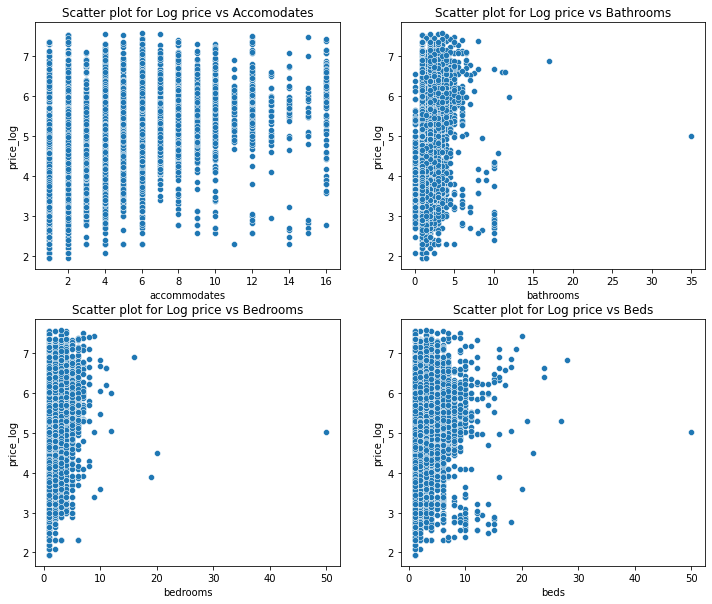

In [32]:
fig, ax = plt.subplots(figsize=(12, 10))
plt.subplot(2, 2, 1)
sns.scatterplot(df_lon.accommodates, df_lon.price_log)
plt.title("Scatter plot for Log price vs Accomodates")

plt.subplot(2, 2, 2)
sns.scatterplot(df_lon.bathrooms, df_lon.price_log)
plt.title("Scatter plot for Log price vs Bathrooms")

plt.subplot(2, 2, 3)
sns.scatterplot(df_lon.bedrooms, df_lon.price_log)
plt.title("Scatter plot for Log price vs Bedrooms")

plt.subplot(2, 2, 4)
sns.scatterplot(df_lon.beds, df_lon.price_log)
plt.title("Scatter plot for Log price vs Beds")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Scatter plot for Log price vs Number of Reviews')

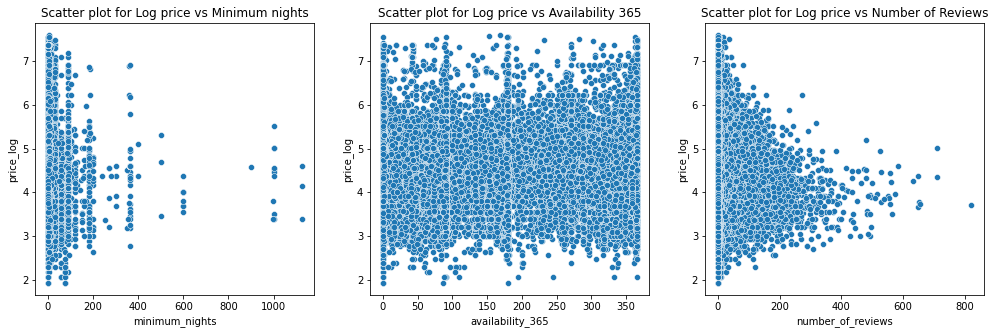

In [33]:

fig, ax = plt.subplots(figsize=(17, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(df_lon.minimum_nights, df_lon.price_log)
plt.title("Scatter plot for Log price vs Minimum nights")

plt.subplot(1, 3, 2)
sns.scatterplot(df_lon.availability_365, df_lon.price_log)
plt.title("Scatter plot for Log price vs Availability 365")

plt.subplot(1, 3, 3)
sns.scatterplot(df_lon.number_of_reviews, df_lon.price_log)
plt.title("Scatter plot for Log price vs Number of Reviews")


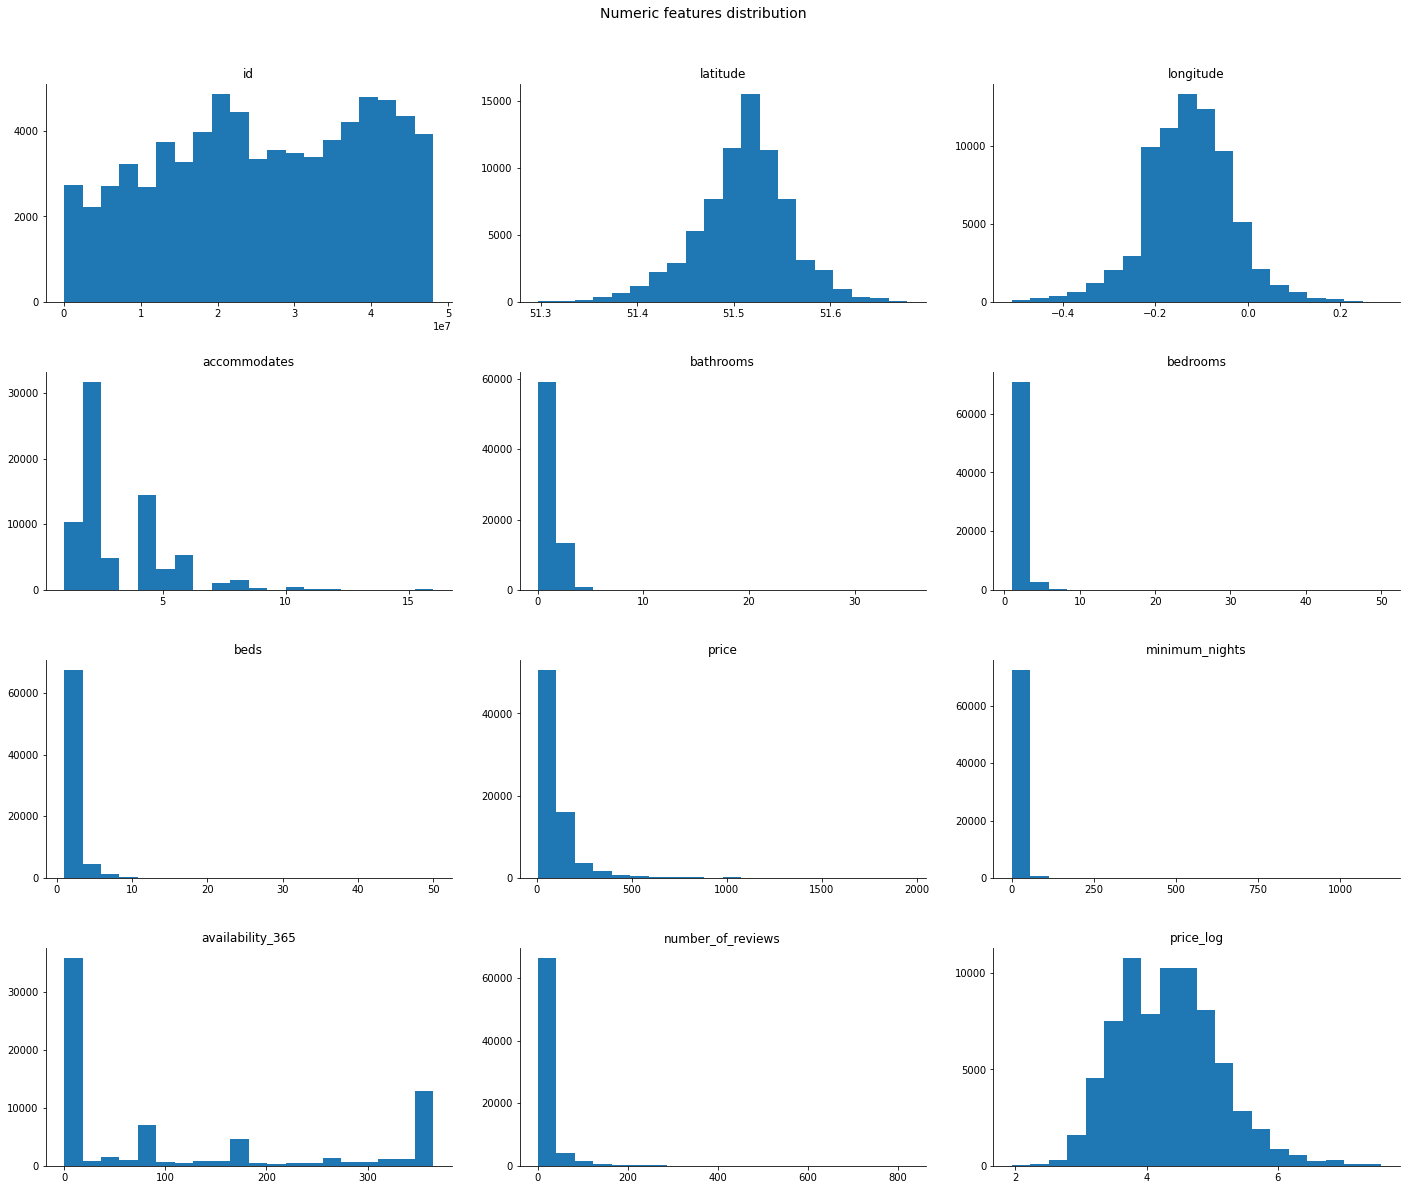

In [34]:
df_lon.hist(figsize=(20, 17), bins=20, grid=False)
sns.despine()
plt.rcParams.update({'font.size': 22})
plt.suptitle('Numeric features distribution', fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])

### correlations between values

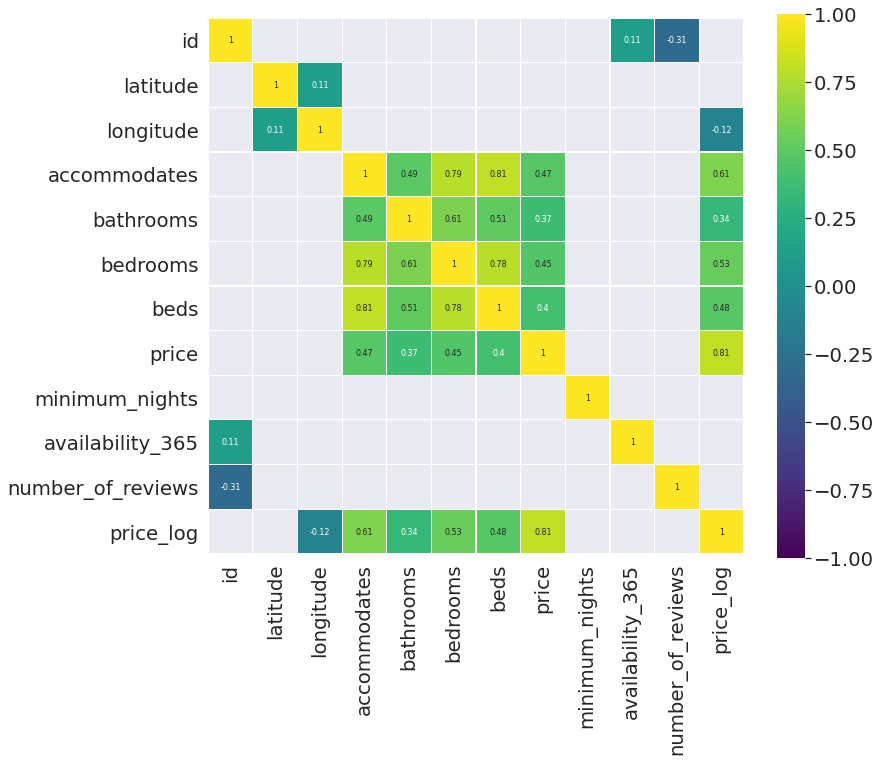

In [35]:
corr = df_lon.corr()
plt.figure(figsize=(12, 10))
sns.set(font_scale=1.8)
sns.heatmap(corr[(corr >= 0.1) | (corr <= -0.1)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

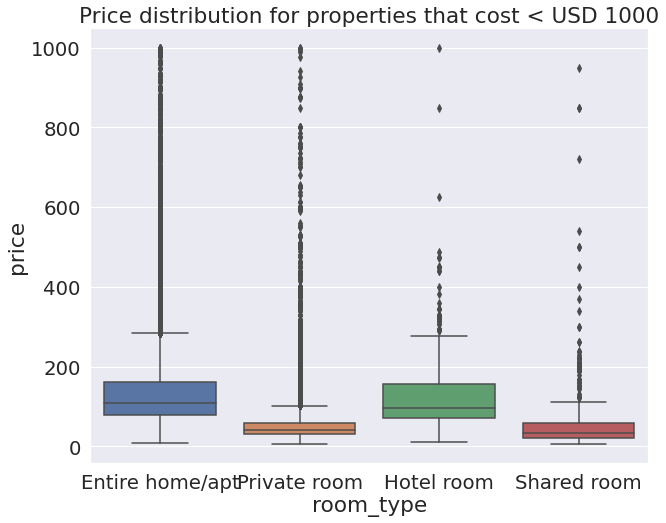

In [36]:
plt.figure(figsize=(10,8))
plt.title('Price distribution for properties that cost < USD 1000')
sns.boxplot(y='price', x='room_type', data = df_lon[df_lon['price'] < 1000])

### Lets look at neighbourhood groups

In [37]:

df_lon['neighbourhood_cleansed'].value_counts()[0:5]

Westminster               8218
Tower Hamlets             6640
Hackney                   5511
Kensington and Chelsea    5095
Camden                    4983
Name: neighbourhood_cleansed, dtype: int64

Lets see the distributuion of room type and review rating . 

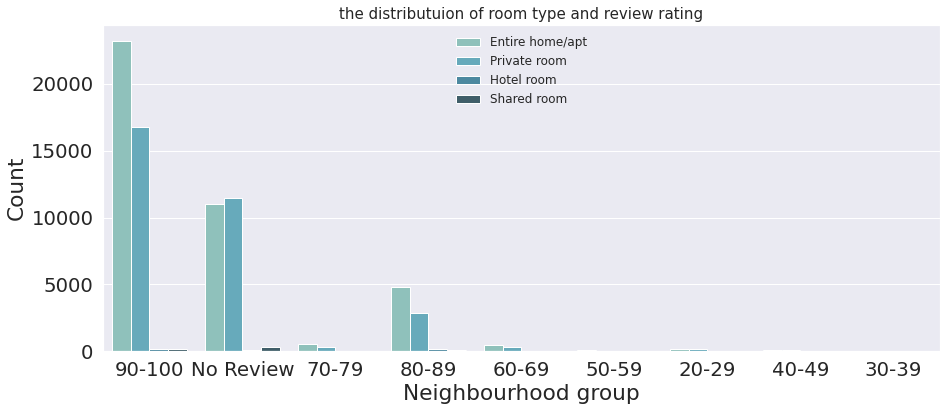

In [38]:
plt.figure(figsize=(15,6))
sns.countplot(data=df_lon, x='review_scores_rating', hue='room_type', palette='GnBu_d')
plt.title('the distributuion of room type and review rating', fontsize=15)
plt.xlabel('Neighbourhood group')
plt.ylabel("Count")
plt.legend(frameon=False, fontsize=12)

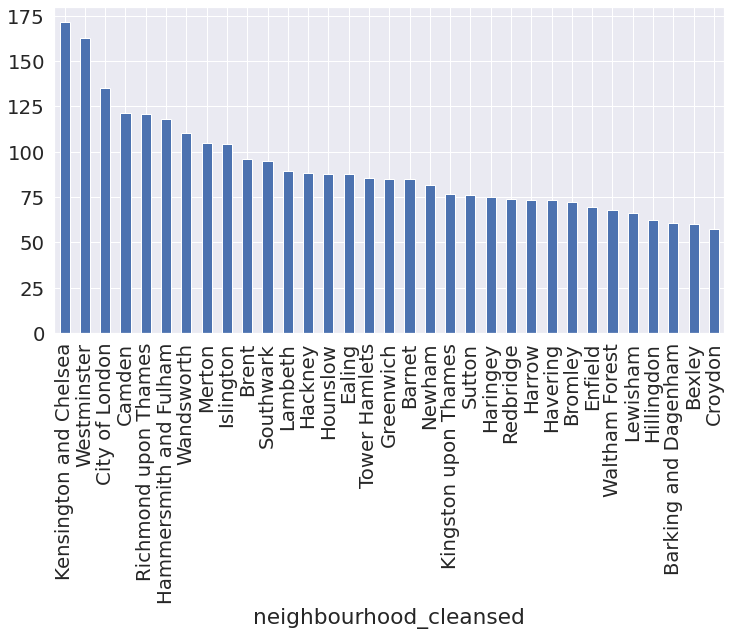

In [39]:
plt.figure(figsize = (12, 6))
df_lon.groupby('neighbourhood_cleansed')['price'].mean().sort_values(ascending=False).plot.bar()
plt.show()

# Feature Engineering

In [40]:
pd.set_option('display.max_rows', df_lon.shape[0]+1)
df_lon.describe(include = 'all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,73534,NaN,NaN,NaN,2.60351e+07,1.34635e+07,15400,1.53072e+07,2.61201e+07,3.81531e+07,4.8103e+07
neighbourhood_cleansed,73534,33,Westminster,8218,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,73534,NaN,NaN,NaN,51.5101,0.0474143,51.2973,51.4845,51.5142,51.5394,51.68
longitude,73534,NaN,NaN,NaN,-0.128033,0.0945365,-0.51022,-0.1881,-0.125685,-0.06915,0.28857
property_type,73534,90,Entire apartment,30773,NaN,NaN,NaN,NaN,NaN,NaN,NaN
room_type,73534,4,Entire home/apt,40420,NaN,NaN,NaN,NaN,NaN,NaN,NaN
accommodates,73534,NaN,NaN,NaN,3.06918,1.94189,1,2,2,4,16
bathrooms,73534,NaN,NaN,NaN,1.30716,0.61578,0,1,1,1.5,35
bedrooms,73534,NaN,NaN,NaN,1.46056,0.868545,1,1,1,2,50
beds,73534,NaN,NaN,NaN,1.75255,1.25881,1,1,1,2,50


In [41]:
#Drop unneceassry columns
# we used number_of_reviews for binning so we can drop them now
#df_NYC.drop(['id', 'latitude','longitude', 'number_of_reviews','host_neighbourhood'], axis = 1, inplace = True)
df_lon.drop(['id', 'number_of_reviews'], axis = 1, inplace = True)

In [42]:
df_lon.dtypes

neighbourhood_cleansed     object
latitude                  float64
longitude                 float64
property_type              object
room_type                  object
accommodates                int64
bathrooms                 float64
bedrooms                  float64
beds                      float64
price                     float64
minimum_nights              int64
availability_365            int64
review_scores_rating       object
instant_bookable           object
price_log                 float64
dtype: object

#### Encoding Categorical Variables

we have to convert the categorical variables into numerical variables to use them in modeling process. We use sklearn's label encoder to encode the categorical variables. But inour dataset we have some ordinal variables and their order matters. if we use sklearn's label encoder, then it randomly assign a value to a catagory and its ordinality would be lost. To preserve their ordinality, we replace method to manually encode orninal variables.

In [43]:
df_lon.review_scores_rating.unique()

array(['90-100', 'No Review', '70-79', '80-89', '60-69', '50-59', '20-29',
       '40-49', '30-39'], dtype=object)

In [44]:
df_lon.room_type.unique()

array(['Entire home/apt', 'Private room', 'Hotel room', 'Shared room'],
      dtype=object)

In [45]:
df_lon.review_scores_rating.replace(to_replace = ['No Review', '20-29', '30-39', '40-49','50-59', '60-69', '70-79', '80-89', '90-100'], value = [0, 1, 2, 3, 4, 5, 6, 7, 8], inplace = True)
df_lon.room_type.replace(to_replace = ['Entire home/apt', 'Hotel room', 'Private room', 'Shared room'], value = [0, 1, 2, 3], inplace = True)

One Hot Encoding 

Those categorical variables that have not any inherent order will be encoded with into numerical for our model using pandas get_dummies method. So basically for variables in dataframe with nominal category dtypes we use one hot encoding.

In [46]:
df_lon[['neighbourhood_cleansed']]=df_lon[['neighbourhood_cleansed']].apply(LabelEncoder().fit_transform)
df_lon[['property_type']]=df_lon[['property_type']].apply(LabelEncoder().fit_transform)
df_lon[['instant_bookable']]=df_lon[['instant_bookable']].apply(LabelEncoder().fit_transform)

In [47]:
df_lon.dtypes

neighbourhood_cleansed      int64
latitude                  float64
longitude                 float64
property_type               int64
room_type                   int64
accommodates                int64
bathrooms                 float64
bedrooms                  float64
beds                      float64
price                     float64
minimum_nights              int64
availability_365            int64
review_scores_rating        int64
instant_bookable            int64
price_log                 float64
dtype: object

#### Splitting Train and Test 

In [48]:
#separating labels and predictors

X=df_lon.drop(['price','price_log'],axis=1)
y_price=df_lon['price'].values
y_price_log=df_lon['price_log'].values

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y_price, test_size = 0.2, random_state = 11)

In [50]:
print("X_train = ", X_train.shape,"\ny_train = ", y_train.shape, "\nX_test = ", X_test.shape,"\ny_test = ", y_test.shape)

X_train =  (58827, 13) 
y_train =  (58827,) 
X_test =  (14707, 13) 
y_test =  (14707,)


In [51]:
evaluation_df=pd.DataFrame(columns = ['model','R_sq_test','R_sq_train','RMSE_test','RMSE_train', 'MAE_test','MAE_train'])

# K NEAREST NEIGHBOUR Model
K NEAREST NEIGHBOUR can be used for regression. But there is a better model which is KNeighborsRegressor which is used for regression tasks. Therefore, we will try KNeighborsRegressor for our price prediction goal.

#### KNN Regression with Non Transformed price

In [52]:
knn = KNeighborsRegressor(5, metric="euclidean")
knn.fit(X_train,y_train)

y_pred_test=knn.predict(X_test)
y_pred_train=knn.predict(X_train)


evaluation_df = evaluation_df.append({'model' : 'KNN_nonTransformed_Price',
                    'R_sq_test' : r2_score(y_test,y_pred_test),
                    'R_sq_train' : r2_score(y_train,y_pred_train),
                    'RMSE_test' : np.sqrt(mean_squared_error(y_test,y_pred_test)),
                    'RMSE_train' : np.sqrt(mean_squared_error(y_train,y_pred_train)),
                    'MAE_test' : median_absolute_error(y_test,y_pred_test),
                    'MAE_train' : median_absolute_error(y_train,y_pred_train)},           
                    ignore_index=True)
evaluation_df

,model,R_sq_test,R_sq_train,RMSE_test,RMSE_train,MAE_test,MAE_train
0,KNN_nonTransformed_Price,0.297231,0.538206,103.627504,82.400033,22.0,17.4


In [69]:
#evaluation_df.drop(evaluation_df.tail(1).index,inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

Text(0.5, 0, 'Histogram of residual values of Test Data')

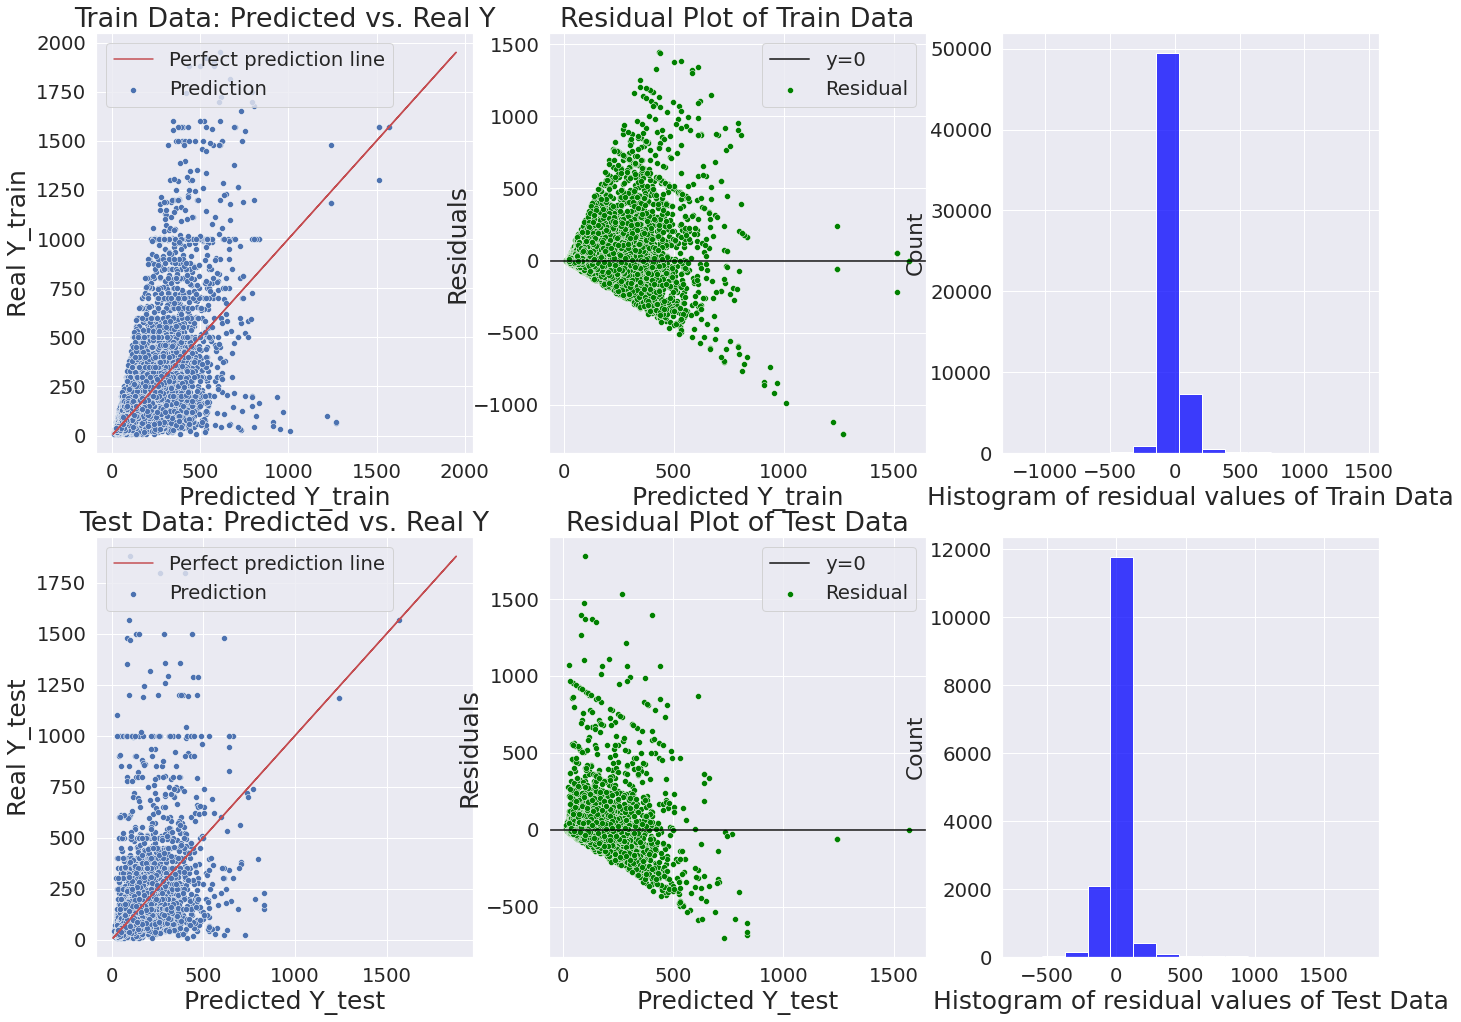

In [54]:
fig, ax = plt.subplots(figsize=(23, 17))
plt.subplot(2, 3, 1)
sns.scatterplot(y_pred_train, y_train, label='Prediction')
plt.plot(y_train,y_train,'r',label='Perfect prediction line')
plt.legend()
# Set x-axis label
plt.xlabel('Predicted Y_train',fontsize=25)
# Set y-axis label
plt.ylabel('Real Y_train',fontsize=25)
plt.title("Train Data: Predicted vs. Real Y",fontsize=27)

plt.subplot(2, 3, 2)
sns.scatterplot(y_pred_train, y_train-y_pred_train, color='green',label='Residual')
plt.axhline(y=0, color='black', linewidth=2.0, alpha=0.7, label='y=0')
plt.legend()
# Set x-axis label
plt.xlabel('Predicted Y_train',fontsize=25)
# Set y-axis label
plt.ylabel('Residuals',fontsize=25)
plt.title("Residual Plot of Train Data",fontsize=27)

plt.subplot(2, 3, 3)
sns.histplot(y_train-y_pred_train, bins=15, color='blue')
plt.xlabel('Histogram of residual values of Train Data',fontsize=25)

#for test data

plt.subplot(2, 3, 4)
sns.scatterplot(y_pred_test, y_test, label='Prediction')
plt.plot(y_test,y_test,'r',label='Perfect prediction line')
plt.legend()
# Set x-axis label
plt.xlabel('Predicted Y_test',fontsize=25)
# Set y-axis label
plt.ylabel('Real Y_test',fontsize=25)
plt.title("Test Data: Predicted vs. Real Y",fontsize=27)

plt.subplot(2, 3, 5)
sns.scatterplot(y_pred_test, y_test-y_pred_test, color='green',label='Residual')
plt.axhline(y=0, color='black', linewidth=2.0, alpha=0.7, label='y=0')
plt.legend()
# Set x-axis label
plt.xlabel('Predicted Y_test',fontsize=25)
# Set y-axis label
plt.ylabel('Residuals',fontsize=25)
plt.title("Residual Plot of Test Data",fontsize=27)

plt.subplot(2, 3, 6)
sns.histplot(y_test-y_pred_test, bins=15, color='blue')
plt.xlabel('Histogram of residual values of Test Data',fontsize=25)


#### KNN Regression with Log Transformed price

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y_price_log, test_size = 0.2, random_state = 11)

In [56]:
print("X_train = ", X_train.shape,"\ny_train = ", y_train.shape, "\nX_test = ", X_test.shape,"\ny_test = ", y_test.shape)

X_train =  (58827, 13) 
y_train =  (58827,) 
X_test =  (14707, 13) 
y_test =  (14707,)


In [57]:
knn = KNeighborsRegressor(5, metric="euclidean")
knn.fit(X_train,y_train)

y_pred_test=knn.predict(X_test)
y_pred_train=knn.predict(X_train)


evaluation_df = evaluation_df.append({'model' : 'KNN_logTransformed_Price',
                    'R_sq_test' : r2_score(y_test,y_pred_test),
                    'R_sq_train' : r2_score(y_train,y_pred_train),
                    'RMSE_test' : np.sqrt(mean_squared_error(y_test,y_pred_test)),
                    'RMSE_train' : np.sqrt(mean_squared_error(y_train,y_pred_train)),
                    'MAE_test' : median_absolute_error(y_test,y_pred_test),
                    'MAE_train' : median_absolute_error(y_train,y_pred_train)},           
                    ignore_index=True)
evaluation_df

,model,R_sq_test,R_sq_train,RMSE_test,RMSE_train,MAE_test,MAE_train
0,KNN_nonTransformed_Price,0.297231,0.538206,103.627504,82.400033,22.000000,17.400000
1,KNN_logTransformed_Price,0.549170,0.706933,0.516583,0.412762,0.293989,0.231357


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

Text(0.5, 0, 'Histogram of residual values of Test Data')

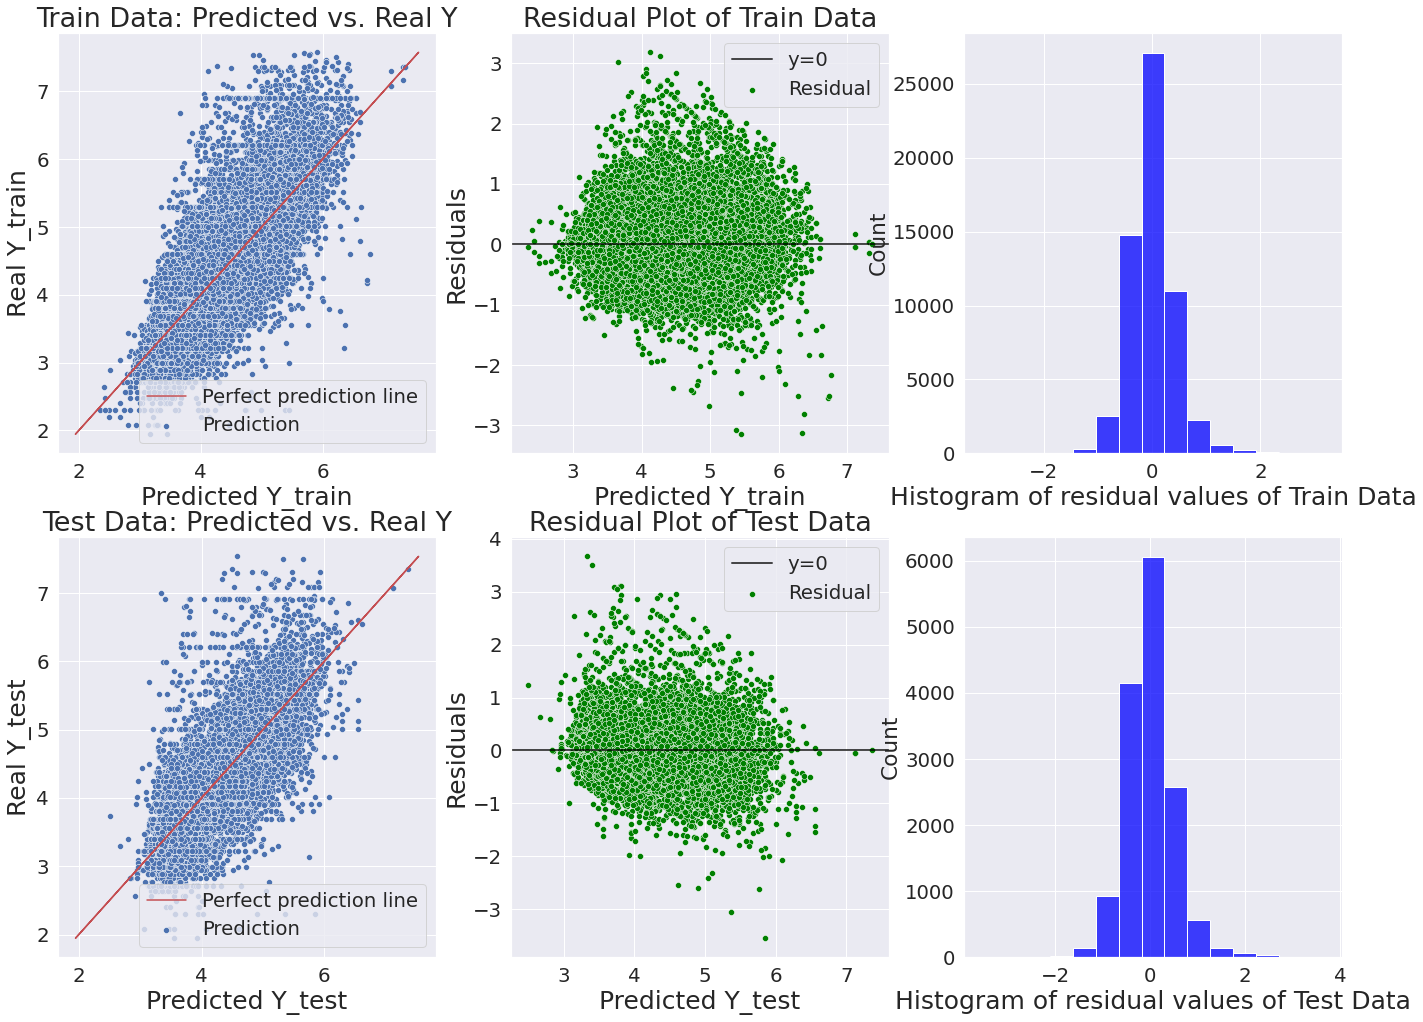

In [58]:
fig, ax = plt.subplots(figsize=(23, 17))
plt.subplot(2, 3, 1)
sns.scatterplot(y_pred_train, y_train, label='Prediction')
plt.plot(y_train,y_train,'r',label='Perfect prediction line')
plt.legend()
# Set x-axis label
plt.xlabel('Predicted Y_train',fontsize=25)
# Set y-axis label
plt.ylabel('Real Y_train',fontsize=25)
plt.title("Train Data: Predicted vs. Real Y",fontsize=27)

plt.subplot(2, 3, 2)
sns.scatterplot(y_pred_train, y_train-y_pred_train, color='green',label='Residual')
plt.axhline(y=0, color='black', linewidth=2.0, alpha=0.7, label='y=0')
plt.legend()
# Set x-axis label
plt.xlabel('Predicted Y_train',fontsize=25)
# Set y-axis label
plt.ylabel('Residuals',fontsize=25)
plt.title("Residual Plot of Train Data",fontsize=27)

plt.subplot(2, 3, 3)
sns.histplot(y_train-y_pred_train, bins=15, color='blue')
plt.xlabel('Histogram of residual values of Train Data',fontsize=25)

#for test data

plt.subplot(2, 3, 4)
sns.scatterplot(y_pred_test, y_test, label='Prediction')
plt.plot(y_test,y_test,'r',label='Perfect prediction line')
plt.legend()
# Set x-axis label
plt.xlabel('Predicted Y_test',fontsize=25)
# Set y-axis label
plt.ylabel('Real Y_test',fontsize=25)
plt.title("Test Data: Predicted vs. Real Y",fontsize=27)

plt.subplot(2, 3, 5)
sns.scatterplot(y_pred_test, y_test-y_pred_test, color='green',label='Residual')
plt.axhline(y=0, color='black', linewidth=2.0, alpha=0.7, label='y=0')
plt.legend()
# Set x-axis label
plt.xlabel('Predicted Y_test',fontsize=25)
# Set y-axis label
plt.ylabel('Residuals',fontsize=25)
plt.title("Residual Plot of Test Data",fontsize=27)

plt.subplot(2, 3, 6)
sns.histplot(y_test-y_pred_test, bins=15, color='blue')
plt.xlabel('Histogram of residual values of Test Data',fontsize=25)


## HYPERPARAMETER TUNING FOR KNN¶
Since we have hyperparamaters such as number of nearest neighbour, or distance metric, we will apply hyperparamater tuning to see if we can decrease the error. Let's test it by:

1) Number of Neighbours(1, .... ,10)

2) Distance Function (1: Euclidean, 2: Manhattan)

3) Cross Validations:

And since we split the data by 80 training, 20 test data. We will do 100 / 20 = 5 cross validation splits.
We will use GridSearchCV which searchs the model with all possible combinations with using cross validation. It calculates all the scores and finds the model which performed best

In [59]:
from sklearn.model_selection import GridSearchCV
param_grid = {'p': [1, 2],  
              'n_neighbors' : [ 5, 10, 15]
              } 

grid_knn = GridSearchCV(KNeighborsRegressor(n_jobs=-1), param_grid, refit = True, verbose = 10, n_jobs=-1, cv=5,scoring="r2") 

grid_knn.fit(X,y_price_log)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   15.5s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   23.2s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   35.4s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   49.4s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=-1,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'n_neighbors': [5, 10, 15], 'p': [1, 2]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=10)

In [60]:
print(f"Best parameters are {grid_knn.best_params_}") 
print("Best score is {}".format(grid_knn.best_score_ * -1))
print("Best model is {}".format(grid_knn.best_estimator_))

Best parameters are {'n_neighbors': 15, 'p': 1}
Best score is -0.5458478451063081
Best model is KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=-1, n_neighbors=15, p=1,
                    weights='uniform')


In [61]:
knn_best = KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=-1, n_neighbors=15, p=1,
                    weights='uniform')

knn_best.fit(X_train, y_train)


y_pred_test=knn_best.predict(X_test)
y_pred_train=knn_best.predict(X_train)


evaluation_df = evaluation_df.append({'model' : 'KNN_best_log',
                    'R_sq_test' : r2_score(y_test,y_pred_test),
                    'R_sq_train' : r2_score(y_train,y_pred_train),
                    'RMSE_test' : np.sqrt(mean_squared_error(y_test,y_pred_test)),
                    'RMSE_train' : np.sqrt(mean_squared_error(y_train,y_pred_train)),
                    'MAE_test' : median_absolute_error(y_test,y_pred_test),
                    'MAE_train' : median_absolute_error(y_train,y_pred_train)},           
                    ignore_index=True)
evaluation_df

,model,R_sq_test,R_sq_train,RMSE_test,RMSE_train,MAE_test,MAE_train
0,KNN_nonTransformed_Price,0.297231,0.538206,103.627504,82.400033,22.000000,17.400000
1,KNN_logTransformed_Price,0.549170,0.706933,0.516583,0.412762,0.293989,0.231357
2,KNN_best_log,0.585380,0.642391,0.495404,0.455953,0.282101,0.259777


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

Text(0.5, 0, 'Histogram of residual values of Test Data')

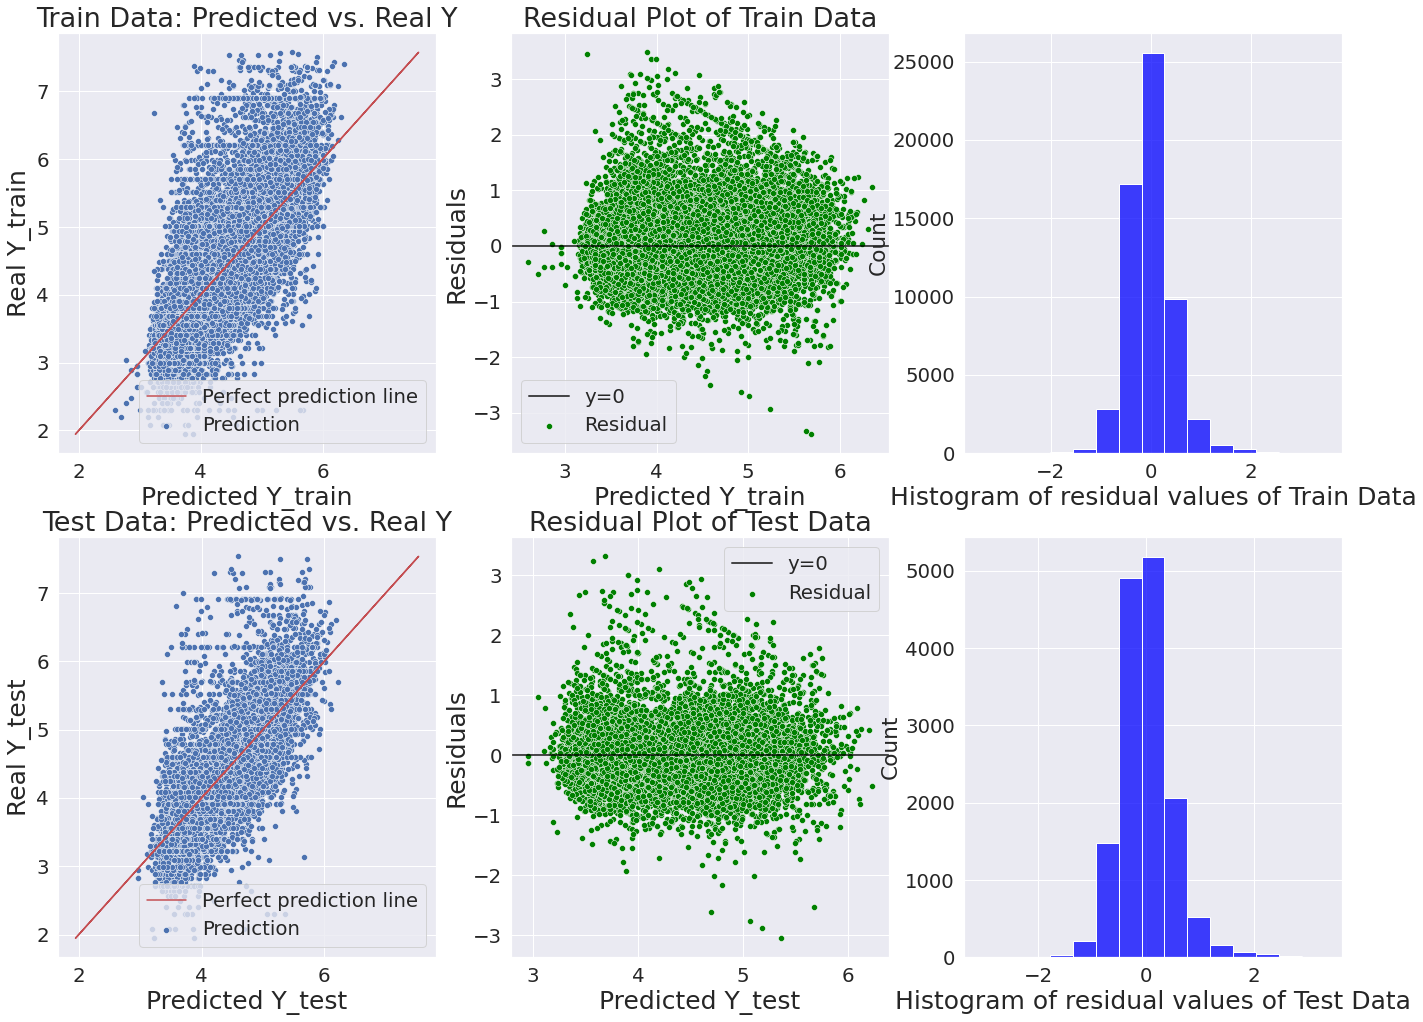

In [62]:
fig, ax = plt.subplots(figsize=(23, 17))
plt.subplot(2, 3, 1)
sns.scatterplot(y_pred_train, y_train, label='Prediction')
plt.plot(y_train,y_train,'r',label='Perfect prediction line')
plt.legend()
# Set x-axis label
plt.xlabel('Predicted Y_train',fontsize=25)
# Set y-axis label
plt.ylabel('Real Y_train',fontsize=25)
plt.title("Train Data: Predicted vs. Real Y",fontsize=27)

plt.subplot(2, 3, 2)
sns.scatterplot(y_pred_train, y_train-y_pred_train, color='green',label='Residual')
plt.axhline(y=0, color='black', linewidth=2.0, alpha=0.7, label='y=0')
plt.legend()
# Set x-axis label
plt.xlabel('Predicted Y_train',fontsize=25)
# Set y-axis label
plt.ylabel('Residuals',fontsize=25)
plt.title("Residual Plot of Train Data",fontsize=27)

plt.subplot(2, 3, 3)
sns.histplot(y_train-y_pred_train, bins=15, color='blue')
plt.xlabel('Histogram of residual values of Train Data',fontsize=25)

#for test data

plt.subplot(2, 3, 4)
sns.scatterplot(y_pred_test, y_test, label='Prediction')
plt.plot(y_test,y_test,'r',label='Perfect prediction line')
plt.legend()
# Set x-axis label
plt.xlabel('Predicted Y_test',fontsize=25)
# Set y-axis label
plt.ylabel('Real Y_test',fontsize=25)
plt.title("Test Data: Predicted vs. Real Y",fontsize=27)

plt.subplot(2, 3, 5)
sns.scatterplot(y_pred_test, y_test-y_pred_test, color='green',label='Residual')
plt.axhline(y=0, color='black', linewidth=2.0, alpha=0.7, label='y=0')
plt.legend()
# Set x-axis label
plt.xlabel('Predicted Y_test',fontsize=25)
# Set y-axis label
plt.ylabel('Residuals',fontsize=25)
plt.title("Residual Plot of Test Data",fontsize=27)

plt.subplot(2, 3, 6)
sns.histplot(y_test-y_pred_test, bins=15, color='blue')
plt.xlabel('Histogram of residual values of Test Data',fontsize=25)


Text(0.5, 1.0, 'Q-Q plot for the test residuals')

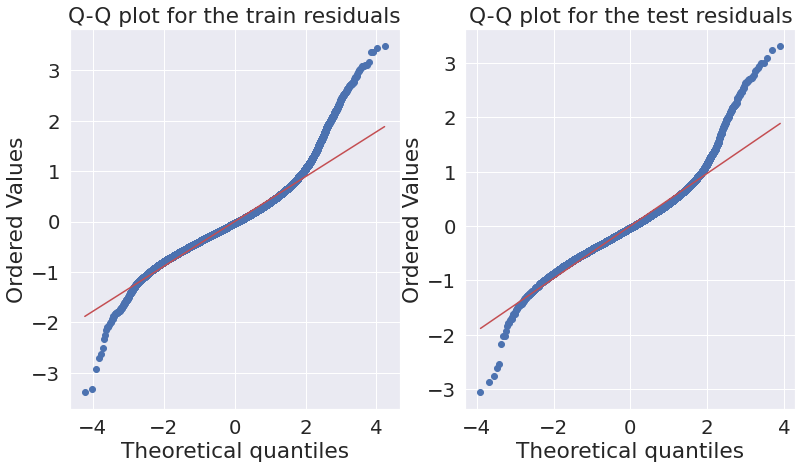

In [63]:
fig, ax = plt.subplots(figsize=(13, 7))
plt.subplot(1, 2, 1)
stats.probplot(y_train-y_pred_train, dist="norm", plot=pylab)
plt.title("Q-Q plot for the train residuals")

plt.subplot(1, 2, 2)
stats.probplot(y_test-y_pred_test, dist="norm", plot=pylab)
plt.title("Q-Q plot for the test residuals")

# XGBoost Regressor Model

#### XGBoost Regression with default parameters on log Transformed price

In [64]:
XGB = xgb.XGBRegressor()
XGB.fit(X_train,y_train)

y_pred_test=XGB.predict(X_test)
y_pred_train=XGB.predict(X_train)


evaluation_df = evaluation_df.append({'model' : 'XGB_without_Tuning',
                    'R_sq_test' : r2_score(y_test,y_pred_test),
                    'R_sq_train' : r2_score(y_train,y_pred_train),
                    'RMSE_test' : np.sqrt(mean_squared_error(y_test,y_pred_test)),
                    'RMSE_train' : np.sqrt(mean_squared_error(y_train,y_pred_train)),
                    'MAE_test' : median_absolute_error(y_test,y_pred_test),
                    'MAE_train' : median_absolute_error(y_train,y_pred_train)},           
                    ignore_index=True)
evaluation_df

[22:41:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,model,R_sq_test,R_sq_train,RMSE_test,RMSE_train,MAE_test,MAE_train
0,KNN_nonTransformed_Price,0.297231,0.538206,103.627504,82.400033,22.000000,17.400000
1,KNN_logTransformed_Price,0.549170,0.706933,0.516583,0.412762,0.293989,0.231357
2,KNN_best_log,0.585380,0.642391,0.495404,0.455953,0.282101,0.259777
3,XGB_without_Tuning,0.631434,0.644335,0.467080,0.454712,0.261114,0.258223


## hyperparameters tuning of XGBoost
Some of the important hyperparameters to tune an XGBoost are:

n_estimators    = Number of trees one wants to build.

learning_rate   = Rate at which our model learns patterns in data. After every round, it shrinks the feature weights to reach the best optimum.

max_depth   = Determines how deeply each tree is allowed to grow during any boosting round.

colsample_bytree = Percentage of features used per tree.

gamma   = Specifies the minimum loss reduction required to make a split.

In [65]:
param_grid = {'n_estimators': [50, 100, 150],
              'learning_rate': [0.01, 0.05, 0.1], 
              'max_depth': [3, 4, 5, 6],
              'colsample_bytree': [0.6, 0.7, 1],
              'gamma': [0.0, 0.1, 0.2]}

# instantiate the tuned random forest
booster_grid_search = GridSearchCV(XGB, param_grid, cv=3, n_jobs=-1)

# train the tuned random forest
booster_grid_search.fit(X_train, y_train)

# print best estimator parameters found during the grid search
print(booster_grid_search.best_params_)

[23:22:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
{'colsample_bytree': 0.7, 'gamma': 0.0, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 150}


In [70]:
# instantiate xgboost with best parameters
XGB_best = xgb.XGBRegressor(colsample_bytree=0.6, gamma=0.2, learning_rate=0.05, 
                           max_depth=6, n_estimators=150, random_state=4)

# train
XGB_best.fit(X_train, y_train)


y_pred_test=XGB_best.predict(X_test)
y_pred_train=XGB_best.predict(X_train)


evaluation_df = evaluation_df.append({'model' : 'XGB_withTuning',
                    'R_sq_test' : r2_score(y_test,y_pred_test),
                    'R_sq_train' : r2_score(y_train,y_pred_train),
                    'RMSE_test' : np.sqrt(mean_squared_error(y_test,y_pred_test)),
                    'RMSE_train' : np.sqrt(mean_squared_error(y_train,y_pred_train)),
                    'MAE_test' : median_absolute_error(y_test,y_pred_test),
                    'MAE_train' : median_absolute_error(y_train,y_pred_train)},           
                    ignore_index=True)

evaluation_df

,model,R_sq_test,R_sq_train,RMSE_test,RMSE_train,MAE_test,MAE_train
0,KNN_nonTransformed_Price,0.297231,0.538206,103.627504,82.400033,22.000000,17.400000
1,KNN_logTransformed_Price,0.549170,0.706933,0.516583,0.412762,0.293989,0.231357
2,KNN_best_log,0.585380,0.642391,0.495404,0.455953,0.282101,0.259777
3,XGB_without_Tuning,0.631434,0.644335,0.467080,0.454712,0.261114,0.258223
4,XGB_withTuning,0.661243,0.691188,0.447794,0.423705,0.252274,0.243083


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

Text(0.5, 0, 'Histogram of residual values of Test Data')

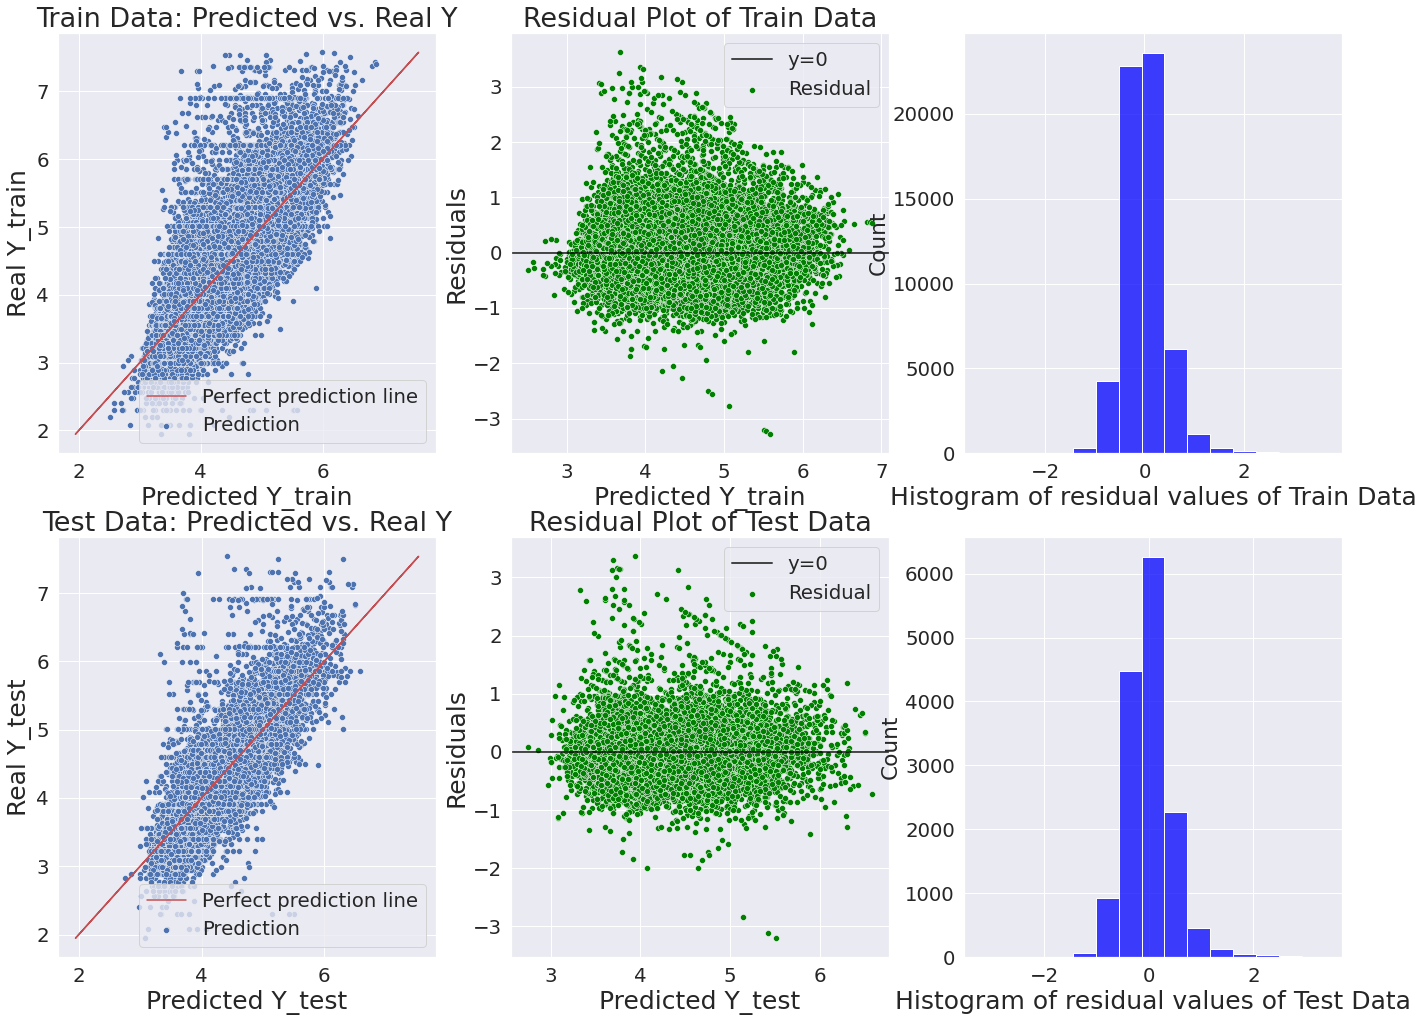

In [67]:
fig, ax = plt.subplots(figsize=(23, 17))
plt.subplot(2, 3, 1)
sns.scatterplot(y_pred_train, y_train, label='Prediction')
plt.plot(y_train,y_train,'r',label='Perfect prediction line')
plt.legend()
# Set x-axis label
plt.xlabel('Predicted Y_train',fontsize=25)
# Set y-axis label
plt.ylabel('Real Y_train',fontsize=25)
plt.title("Train Data: Predicted vs. Real Y",fontsize=27)

plt.subplot(2, 3, 2)
sns.scatterplot(y_pred_train, y_train-y_pred_train, color='green',label='Residual')
plt.axhline(y=0, color='black', linewidth=2.0, alpha=0.7, label='y=0')
plt.legend()
# Set x-axis label
plt.xlabel('Predicted Y_train',fontsize=25)
# Set y-axis label
plt.ylabel('Residuals',fontsize=25)
plt.title("Residual Plot of Train Data",fontsize=27)

plt.subplot(2, 3, 3)
sns.histplot(y_train-y_pred_train, bins=15, color='blue')
plt.xlabel('Histogram of residual values of Train Data',fontsize=25)

#for test data

plt.subplot(2, 3, 4)
sns.scatterplot(y_pred_test, y_test, label='Prediction')
plt.plot(y_test,y_test,'r',label='Perfect prediction line')
plt.legend()
# Set x-axis label
plt.xlabel('Predicted Y_test',fontsize=25)
# Set y-axis label
plt.ylabel('Real Y_test',fontsize=25)
plt.title("Test Data: Predicted vs. Real Y",fontsize=27)

plt.subplot(2, 3, 5)
sns.scatterplot(y_pred_test, y_test-y_pred_test, color='green',label='Residual')
plt.axhline(y=0, color='black', linewidth=2.0, alpha=0.7, label='y=0')
plt.legend()
# Set x-axis label
plt.xlabel('Predicted Y_test',fontsize=25)
# Set y-axis label
plt.ylabel('Residuals',fontsize=25)
plt.title("Residual Plot of Test Data",fontsize=27)

plt.subplot(2, 3, 6)
sns.histplot(y_test-y_pred_test, bins=15, color='blue')
plt.xlabel('Histogram of residual values of Test Data',fontsize=25)
